# Echo State Network

In [5]:
import numpy as np
from tqdm import tqdm
from time import sleep
from matplotlib import pyplot as plt
%matplotlib inline
from pyESN import ESN

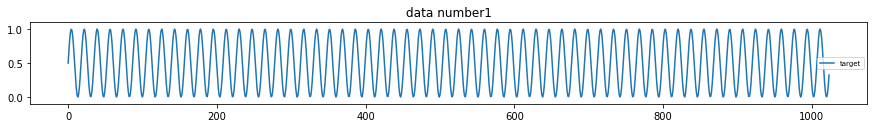

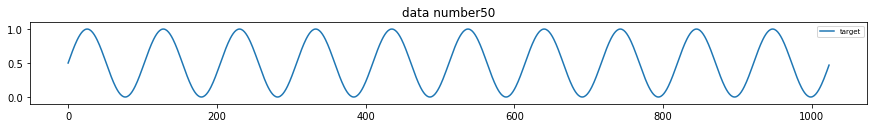

In [38]:
rng = np.random.RandomState(42)
def frequency_generator(K, N):
    C = 1
    frequency = np.zeros((K, N*C, 1))
    z = 0
    n = K+10
    for i in range(K):
        n = n-1
        for j in range(N*C):
            frequency[i][j] = (np.sin(2*z*n/N)+1)/2
            z = z + 2*np.pi
    return frequency

N = 2**11 # signal length
K = 50 # number of signals

data = frequency_generator(K, N)

scale = 2**10
slide = 2**10
view_scale = min(scale, 100)

for i in (0, K-1):
    window_tr = range(int(N/2))
    plt.figure(figsize=(15,1.5))
    plt.plot(data[i][window_tr], label='target')
    plt.legend(fontsize='x-small')
    plt.title('data number{}'.format(i+1))
    plt.ylim([-0.1, 1.1]);

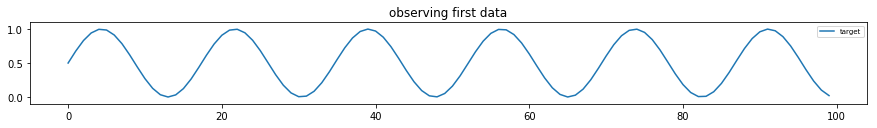

In [39]:
window_tr = range(int(N/40))
plt.figure(figsize=(15,1.5))
plt.plot(data[0][:view_scale], label='target')
plt.legend(fontsize='x-small')
plt.title('observing first data')
plt.ylim([-0.1, 1.1]);

In [6]:
for units in (300, 500, 700, 1000):
    Loss_average = []
    for k in tqdm(range(100)):
        esn = ESN(n_inputs = 1,
                  n_outputs = 1,
                  n_reservoir = units,
                  spectral_radius = 0.85,
                  sparsity = 0.8,
                  teacher_scaling = 1.12,
                  teacher_shift = -0.7,
                  out_activation = np.tanh,
                  inverse_out_activation = np.arctanh,
                  random_state = rng)

        for i in range(10):
            esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
            
        RMSE_alldata = []

        for i in range(10):
            pred_train_check = esn.predict(data[i][:scale])
            RMSE_alldata.append(np.sqrt(np.mean((pred_train_check - data[i][slide:slide+scale])**2)))

        average = np.mean(RMSE_alldata)
        Loss_average.append(average)
    print("average loss {:.4f} in {} units".format(np.mean(Loss_average), units))

  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.0754 in 300 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.0717 in 500 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.0702 in 700 units


100%|██████████| 100/100 [40:21<00:00, 17.79s/it] 

average loss 0.0787 in 1000 units


In [7]:
for units in (300, 500, 700, 1000):
    
    Loss_average = []
    number = range(20)
    experiments = range(100)
    for k in tqdm(experiments):
        esn = ESN(n_inputs = 1,
                  n_outputs = 1,
                  n_reservoir = units,
                  spectral_radius = 0.85,
                  sparsity = 0.8,
                  teacher_scaling = 1.12,
                  teacher_shift = -0.7,
                  out_activation = np.tanh,
                  inverse_out_activation = np.arctanh,
                  random_state = rng)
    
        for i in number:
            esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
            
        RMSE_alldata = [np.sqrt(np.mean((esn.predict(data[i][:scale]) - data[i][slide:slide+scale])**2)) for i in number]

        Loss_average.append(np.mean(RMSE_alldata))
    print("average loss {:.4f} in {} units".format(np.mean(Loss_average), units))

  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.1574 in 300 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.1504 in 500 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.1525 in 700 units


100%|██████████| 100/100 [39:26<00:00, 23.81s/it]

average loss 0.1625 in 1000 units


In [5]:
for units in (300, 500, 700, 1000):
    
    Loss_average = []
    number = range(30)
    experiments = range(100)
    for k in tqdm(experiments):
        esn = ESN(n_inputs = 1,
                  n_outputs = 1,
                  n_reservoir = units,
                  spectral_radius = 0.85,
                  sparsity = 0.8,
                  teacher_scaling = 1.12,
                  teacher_shift = -0.7,
                  out_activation = np.tanh,
                  inverse_out_activation = np.arctanh,
                  random_state = rng)
    
        for i in number:
            esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
            
        RMSE_alldata = [np.sqrt(np.mean((esn.predict(data[i][:scale]) - data[i][slide:slide+scale])**2)) for i in number]

        Loss_average.append(np.mean(RMSE_alldata))
    print("average loss {:.4f} in {} units".format(np.mean(Loss_average), units)

  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.1993 in 300 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.1955 in 500 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.1916 in 700 units


100%|██████████| 100/100 [54:27<00:00, 34.26s/it]

average loss 0.2455 in 1000 units


In [5]:
for units in (300, 500, 700, 1000):
    
    Loss_average = []
    number = range(32)
    experiments = range(100)
    for k in tqdm(experiments):
        esn = ESN(n_inputs = 1,
                  n_outputs = 1,
                  n_reservoir = units,
                  spectral_radius = 0.85,
                  sparsity = 0.8,
                  teacher_scaling = 1.12,
                  teacher_shift = -0.7,
                  out_activation = np.tanh,
                  inverse_out_activation = np.arctanh,
                  random_state = rng)
    
        for i in number:
            esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
            
        RMSE_alldata = [np.sqrt(np.mean((esn.predict(data[i][:scale]) - data[i][slide:slide+scale])**2)) for i in number]

        Loss_average.append(np.mean(RMSE_alldata))
    print("average loss: {:.4f} in {} units".format(np.mean(Loss_average), units))

  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.2114 in 300 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.1989 in 500 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.1853 in 700 units


100%|██████████| 100/100 [58:37<00:00, 34.68s/it] 

average loss: 0.2688 in 1000 units


In [6]:
for units in (300, 500, 700, 1000):
    
    Loss_average = []
    number = range(34)
    experiments = range(100)
    for k in tqdm(experiments):
        esn = ESN(n_inputs = 1,
                  n_outputs = 1,
                  n_reservoir = units,
                  spectral_radius = 0.85,
                  sparsity = 0.8,
                  teacher_scaling = 1.12,
                  teacher_shift = -0.7,
                  out_activation = np.tanh,
                  inverse_out_activation = np.arctanh,
                  random_state = rng)
    
        for i in number:
            esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
            
        RMSE_alldata = [np.sqrt(np.mean((esn.predict(data[i][:scale]) - data[i][slide:slide+scale])**2)) for i in number]

        Loss_average.append(np.mean(RMSE_alldata))
    print("average loss: {:.4f} in {} units".format(np.mean(Loss_average), units))

  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.2707 in 300 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.2503 in 500 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.2374 in 700 units


100%|██████████| 100/100 [1:10:46<00:00, 40.89s/it]

average loss: 0.3028 in 1000 units


In [7]:
for units in (300, 500, 700, 1000):
    
    Loss_average = []
    number = range(36)
    experiments = range(100)
    for k in tqdm(experiments):
        esn = ESN(n_inputs = 1,
                  n_outputs = 1,
                  n_reservoir = units,
                  spectral_radius = 0.85,
                  sparsity = 0.8,
                  teacher_scaling = 1.12,
                  teacher_shift = -0.7,
                  out_activation = np.tanh,
                  inverse_out_activation = np.arctanh,
                  random_state = rng)
    
        for i in number:
            esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
            
        RMSE_alldata = [np.sqrt(np.mean((esn.predict(data[i][:scale]) - data[i][slide:slide+scale])**2)) for i in number]

        Loss_average.append(np.mean(RMSE_alldata))
    print("average loss: {:.4f} in {} units".format(np.mean(Loss_average), units))

  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.3211 in 300 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.2712 in 500 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.2844 in 700 units


100%|██████████| 100/100 [1:07:23<00:00, 40.85s/it]

average loss: 0.3554 in 1000 units


In [8]:
for units in (300, 500, 700, 1000):
    
    Loss_average = []
    number = range(38)
    experiments = range(100)
    for k in tqdm(experiments):
        esn = ESN(n_inputs = 1,
                  n_outputs = 1,
                  n_reservoir = units,
                  spectral_radius = 0.85,
                  sparsity = 0.8,
                  teacher_scaling = 1.12,
                  teacher_shift = -0.7,
                  out_activation = np.tanh,
                  inverse_out_activation = np.arctanh,
                  random_state = rng)
    
        for i in number:
            esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
            
        RMSE_alldata = [np.sqrt(np.mean((esn.predict(data[i][:scale]) - data[i][slide:slide+scale])**2)) for i in number]

        Loss_average.append(np.mean(RMSE_alldata))
    print("average loss: {:.4f} in {} units".format(np.mean(Loss_average), units))

  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.3995 in 300 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.3544 in 500 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss: 0.3398 in 700 units


100%|██████████| 100/100 [1:10:45<00:00, 42.25s/it]

average loss: 0.4436 in 1000 units


In [5]:
for units in (300, 500, 700, 1000):
    Loss_average = []
    for k in tqdm(range(100)):
        esn = ESN(n_inputs = 1,
                  n_outputs = 1,
                  n_reservoir = units,
                  spectral_radius = 0.85,
                  sparsity = 0.8,
                  teacher_scaling = 1.12,
                  teacher_shift = -0.7,
                  out_activation = np.tanh,
                  inverse_out_activation = np.arctanh,
                  random_state = rng)

        for i in range(40):
            esn.fit(data[i][:scale], data[i][slide:slide+scale], learning_rate=1/(i+1))
            
        RMSE_alldata = []

        for i in range(40):
            pred_train_check = esn.predict(data[i][:scale])
            RMSE_alldata.append(np.sqrt(np.mean((pred_train_check - data[i][slide:slide+scale])**2)))

        average = np.mean(RMSE_alldata)
        Loss_average.append(average)
    print("average loss {:.4f} in {} units".format(np.mean(Loss_average), units))

  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.4339 in 300 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.4211 in 500 units


  0%|          | 0/100 [00:00<?, ?it/s]

average loss 0.3862 in 700 units


100%|██████████| 100/100 [1:20:29<00:00, 49.99s/it]

average loss 0.4885 in 1000 units


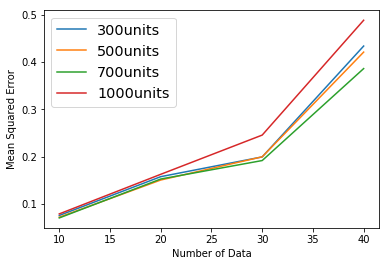

In [6]:
x = np.array([10, 20, 30, 40,])
data300 = np.array([0.0754, 0.1575, 0.1993, 0.4339])
data500 = np.array([0.0717, 0.1504, 0.1995, 0.4211])
data700 = np.array([0.0702, 0.1525, 0.1916, 0.3862])
data1000= np.array([0.0787, 0.1625, 0.2455, 0.4885])

plt.figure()
plt.plot(x, data300, label='300units')
plt.plot(x, data500, label='500units')
plt.plot(x, data700, label='700units')
plt.plot(x, data1000, label='1000units')
plt.xlabel("Number of Data")
plt.ylabel("Mean Squared Error")
plt.legend(fontsize='x-large');

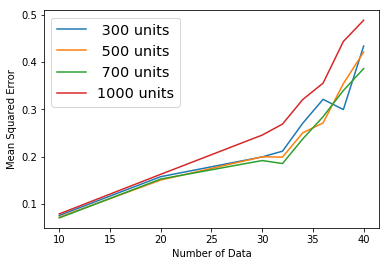

In [4]:
x = np.array([10, 20, 30, 32, 34, 36, 38, 40,])
data300 = np.array([0.0754, 0.1575, 0.1993, 0.2114, 0.2707, 0.3211, 0.2995, 0.4339])
data500 = np.array([0.0717, 0.1504, 0.1995, 0.1989, 0.2503, 0.2712, 0.3544, 0.4211])
data700 = np.array([0.0702, 0.1525, 0.1916, 0.1853, 0.2374, 0.2844, 0.3398, 0.3862])
data1000= np.array([0.0787, 0.1625, 0.2455, 0.2688, 0.3208, 0.3554, 0.4436, 0.4885])

plt.figure()
plt.plot(x, data300, label=' 300 units')
plt.plot(x, data500, label=' 500 units')
plt.plot(x, data700, label=' 700 units')
plt.plot(x, data1000, label='1000 units')
plt.xlabel("Number of Data")
plt.ylabel("Mean Squared Error")
plt.legend(fontsize='x-large');

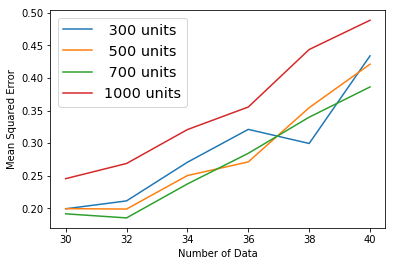

In [7]:
x = np.array([30, 32, 34, 36, 38, 40,])
data300 = np.array([0.1993, 0.2114, 0.2707, 0.3211, 0.2995, 0.4339])
data500 = np.array([0.1995, 0.1989, 0.2503, 0.2712, 0.3544, 0.4211])
data700 = np.array([0.1916, 0.1853, 0.2374, 0.2844, 0.3398, 0.3862])
data1000= np.array([0.2455, 0.2688, 0.3208, 0.3554, 0.4436, 0.4885])

plt.figure()
plt.plot(x, data300, label=' 300 units')
plt.plot(x, data500, label=' 500 units')
plt.plot(x, data700, label=' 700 units')
plt.plot(x, data1000, label='1000 units')
plt.xlabel("Number of Data")
plt.ylabel("Mean Squared Error")
plt.legend(fontsize='x-large');